# Multivariate Gradient Descent

In [39]:
import torch
import matplotlib.pyplot as plt

In [gradient descent](00_gradient_descent.ipynb), we discussed gradient descent for univariate case. 

Here, we will consider multivariate case, with $\textbf{x} \in \mathbb{R}^d$, and the objective function $f: \mathbb{R}^d \rightarrow \mathbb{R}$.

##### Defining a function

To keep things simple, let $\textbf{x} \in \mathbb{R}^2$ i.e. $\textbf{x} = \{x_1, x_2\}$, and the objective function be
$$
f(\textbf{x}) = f(x_1, x_2) = x_1^2 + x_2^2
$$

Then its gradient is given by
$$
\nabla{f(\textbf{x})} = \bigg[\dfrac{\partial{f(\textbf{x})}}{\partial{x_1}}, \dfrac{\partial{f(\textbf{x})}}{\partial{x_2}}\bigg]
$$


In [91]:
def fn(x1, x2):   
    return x1 ** 2 + x2 ** 2

def dfn(x1, x2):   
    return (2 * x1, 2 * x2)

##### Plotting contour

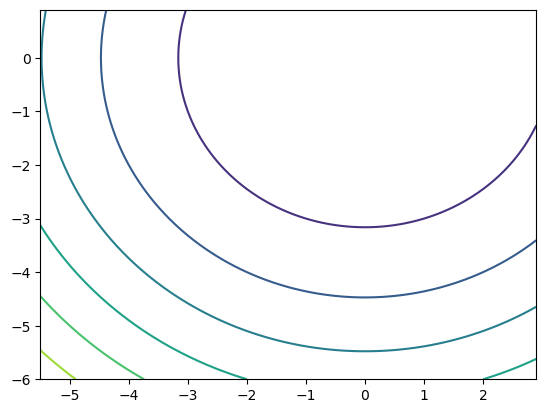

In [99]:
def contour(fn = fn):
    x1 = torch.arange(-5.5, 3., 0.1)
    x2 = torch.arange(-6.0, 1.0, 0.1)
    x1, x2 = torch.meshgrid(x1, x2, indexing = "ij")
    plt.contour(x1, x2, fn(x1, x2))
    
contour()

##### Multivariate Gradient Descent Algorithm

Now, let us define the multivariate gradient descent defined by:
$$
\textbf{x} \gets \textbf{x} - \eta \nabla f(\textbf{x})
$$

In [104]:
def mgd(eta, dfn, steps = 10, start = (0, 0)):
    history = [start]
    x1, x2 = start[0], start[1]
    
    for i in range(steps):
        dx1, dx2 = dfn(x1, x2)
        x1 -= eta * dx1
        x2 -= eta * dx2
        history.append((x1, x2))
        
    return torch.tensor(history)

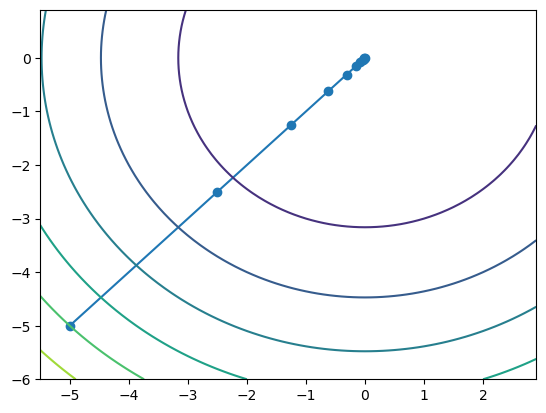

In [105]:
results = mgd(eta = .25, dfn = dfn, start = (-5, -5))
plt.plot(*zip(*results), marker = "o")
contour()